https://github.com/orlandpm/Math-for-Programmers/tree/master/Chapter%2002

In [27]:
!pip install matplotlib

# Three type of drawing

Point, Segment(line), Polygon

That's also how you work with svg if you want to implement a free-drawing whiteboard.

In [28]:
from vector_drawing import *

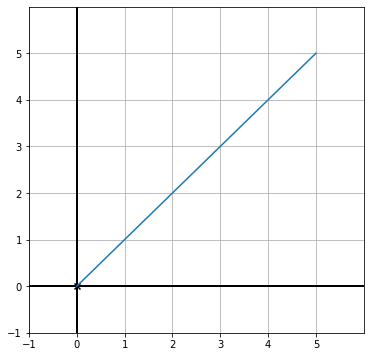

In [29]:
draw(Segment((0, 0), (5, 5)))

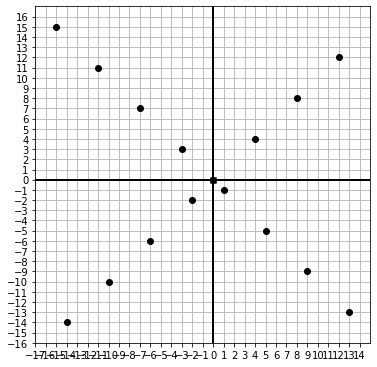

In [32]:
vectors = []
for i in range(16):
    v = i % 4
    if  v== 0:
        vectors.append((i, i))
    elif v == 1: 
        vectors.append((i, -i))
    elif v == 2: 
        vectors.append((-i, -i))
    elif v == 3: 
        vectors.append((-i, i))
draw(Points(*vectors))

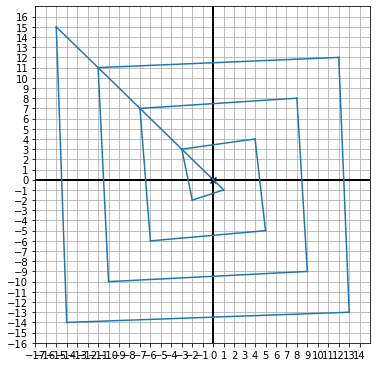

In [33]:
vectors = []
for i in range(16):
    v = i % 4
    if  v== 0:
        vectors.append((i, i))
    elif v == 1: 
        vectors.append((i, -i))
    elif v == 2: 
        vectors.append((-i, -i))
    elif v == 3: 
        vectors.append((-i, i))
draw(Polygon(*vectors))

[-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[100, 81, 64, 49, 36, 25, 16, 9, 4, 1, 0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


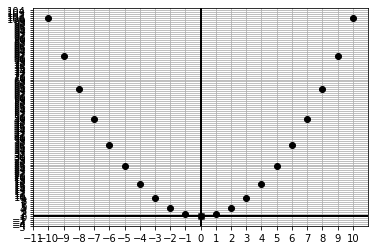

In [44]:
x = [-11 + i for i in range(1, 10 - (-10) + 2)]
print(x)
y = list(map(lambda x: x ** 2, x))
print(y)

draw(Points(*zip(x, y)), nice_aspect_ratio=False)

# 2D vector moving

The secret of moving for a 2d vector graph is to add a vector to all of its vectors. 

In [45]:
dino_vectors = [ (6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1), ]

In [49]:
def add(v1, v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

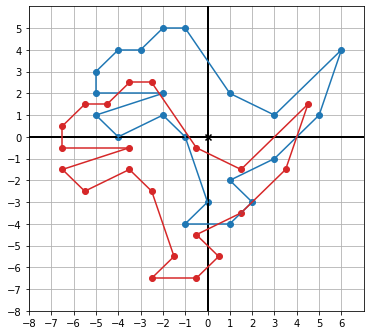

In [48]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
)

# Get vector length

In [51]:
from math import sqrt

def length(v):
    return sqrt(v[0] ** 2 + v[1] ** 2)

length((3,4))

5.0

In [160]:
import numpy as np

np.linalg.norm([3,4])

5.0

# Multiplying vector by numbers

The operation of multiplying a vector by a number is called `scalar multiplication`.

In [59]:
import numpy as np

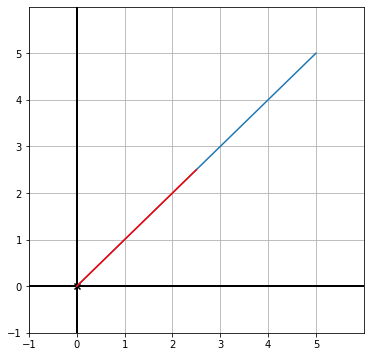

In [70]:
a = np.array([(0, 0), (5, 5)])
b = a * 0.5
draw(
    Segment(*a.tolist()), 
    Segment(*b.tolist(), color="red")
)

# Vector subtraction

On the number line, there are only two directions from zero: positive and negative. 

In the plane, there are many directions (infinitely many, in fact), so we can’t say that one of v and -v is positive while the other is negative. What we can say is that for any vector v, the opposite vector -v will have the same length, but it will point in the opposite direction.

In [74]:
a = np.array([(0, 0), (5, 5)])
b = -a
b

array([[ 0,  0],
       [-5, -5]])

In [75]:
a = np.array([4,4])
b = np.array([1,1])
a - b

array([3, 3])

# Exercise 2.8

Write a function translate(translation, vectors) that takes a translation vector and a list of input vectors, and returns a list of the input vectors all translated by the translation vector. 

For instance, translate ((1,1), [(0,0), (0,1,), (–3,–3)]) should return [(1,1),(1,2),(–2, –2)] .

Solution:
```python
def translate(translation, vectors):
    return [translation + v for v in vectors]
```

Now you know why the position change in Unity is called `translate`.

Because all those modifacation was based on vectors.

```c#
// Move the object upward in world space 1 unit/second.
transform.Translate(Vector3.up * Time.deltaTime, Space.World);
```

# Exercise 2.11—Mini Project 

Write a Python function using vector addition to show 100 simultaneous and non-overlapping copies of the dinosaur. 

This shows the power of computer graphics; imagine how tedious it would be to specify all 2,100 coordinate pairs by hand!

In [88]:
import numpy as np

In [89]:
dino_vectors = [ (6, 4), (3, 1), (1, 2), (-1, 5), (-2, 5), (-3, 4), (-4, 4), (-5, 3), (-5, 2), (-2, 2), (-5, 1), (-4, 0), (-2, 1), (-1, 0), (0, -3), (-1, -4), (1, -4), (2, -3), (1, -2), (3, -1), (5, 1), ]
dinosaur = np.array(dino_vectors)

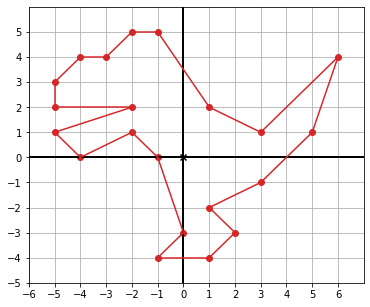

In [90]:
draw(
    Points(*dinosaur.tolist(), color=red),
    Polygon(*dinosaur.tolist(), color=red),
)

In [154]:
side = np.max(dinosaur) - np.min(dinosaur) + 4
side

15

In [155]:
dinosaurs = []
c = 0
r = 0
for _ in range(100):
    new = dinosaur.copy()
    if c == 10:
        r += 1
        c = 0
    new = new + np.array([c*side, r * side])
    dinosaurs += [
        Polygon(*new.tolist(), color=red),
    ]
    c += 1

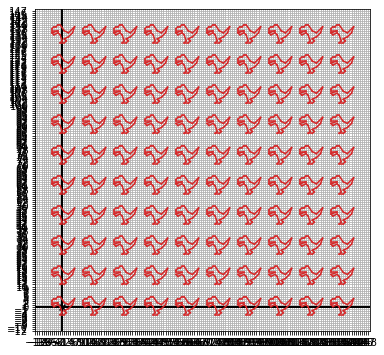

In [156]:
draw(
    *dinosaurs,
)